In [60]:
import pandas as pd
import os

In [61]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

In [63]:
from sklearn.model_selection import train_test_split

## Displacement

In [64]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 50%/50% final results" #path to the folder containing the files
filenames = os.listdir(filepath)
disp_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        disp_data.append(data) #append the data to the list of all data
disp_data = pd.concat(disp_data, axis = 0) #concatenate all the data into a single dataframe

disp_data.index = range(len(disp_data)) #rename indices to avoid issues with duplicates
disp_data=disp_data.drop(columns=['Mass2', 'Stress2'])
disp_data

Loading file: 1-400 results newfile.xlsx
Loading file: 1401-2000 results newfile.xlsx
Loading file: 2001-2500 results newfile.xlsx
Loading file: 2501-3500 results newfile.xlsx
Loading file: 3501-3700 results newfile.xlsx
Loading file: 3701-4000 results newfile.xlsx
Loading file: 4001-4200 results newfile.xlsx
Loading file: 401-1400 results newfile.xlsx
Loading file: 4200-4700 results newfile.xlsx
Loading file: 4701-5000 results newfile.xlsx


,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y,Displacement3
0,59.39160,16.34668,22.87477,13.56152,56.73219,39.37897,16.33808,85.87876,11.34289,-1.373
1,35.23211,26.18333,27.66177,15.24632,29.87560,45.07896,29.47574,68.14849,13.02467,-1.338
2,26.48883,23.32933,37.02466,14.89976,38.91530,32.00901,23.92489,82.37679,14.61354,-1.301
3,33.54176,29.35971,40.09899,8.38806,64.62975,48.54654,31.55843,65.27285,18.88546,-1.385
4,65.02282,31.31793,46.85201,13.97863,30.97744,39.30506,30.17221,78.77987,13.21986,-1.524
...,...,...,...,...,...,...,...,...,...,...
5003,39.07497,13.83198,32.62862,11.02838,66.67895,51.27398,23.89607,66.43648,15.69311,-1.371
5004,32.34590,23.22570,25.87489,10.96513,40.28090,47.29294,21.00310,78.00764,11.41261,-1.293
5005,60.61776,23.05316,25.53504,12.74924,71.39482,49.13145,18.80726,79.55240,17.41671,-1.470
5006,58.62693,19.13819,47.56205,9.24262,29.84110,30.99861,25.57112,75.62581,13.39225,-1.387


In [65]:
XD = disp_data[['triangle', 'small ellipse', 'big ellipse', 'circle',	'back cut length',	'corner',	'triangle to small ellipse',	'circle x',	'circle y']]  # multiple features
yD = disp_data['Displacement3']
XD

,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y
0,59.39160,16.34668,22.87477,13.56152,56.73219,39.37897,16.33808,85.87876,11.34289
1,35.23211,26.18333,27.66177,15.24632,29.87560,45.07896,29.47574,68.14849,13.02467
2,26.48883,23.32933,37.02466,14.89976,38.91530,32.00901,23.92489,82.37679,14.61354
3,33.54176,29.35971,40.09899,8.38806,64.62975,48.54654,31.55843,65.27285,18.88546
4,65.02282,31.31793,46.85201,13.97863,30.97744,39.30506,30.17221,78.77987,13.21986
...,...,...,...,...,...,...,...,...,...
5003,39.07497,13.83198,32.62862,11.02838,66.67895,51.27398,23.89607,66.43648,15.69311
5004,32.34590,23.22570,25.87489,10.96513,40.28090,47.29294,21.00310,78.00764,11.41261
5005,60.61776,23.05316,25.53504,12.74924,71.39482,49.13145,18.80726,79.55240,17.41671
5006,58.62693,19.13819,47.56205,9.24262,29.84110,30.99861,25.57112,75.62581,13.39225


In [66]:
# creating train and test sets 
XD_train, XD_test, yD_train, yD_test = train_test_split(XD, yD, test_size=0.3, random_state=4294967295) 

In [67]:
XD_train

,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y
2319,33.07462,15.56495,26.39408,11.63413,57.71748,31.63604,16.89384,84.82454,19.24884
497,30.31010,29.38033,44.81274,11.89831,36.75910,39.82845,19.80722,88.32389,16.16061
1637,52.40852,18.50767,35.88152,6.41001,71.44712,47.81225,26.54122,77.49866,15.66240
3301,66.84172,30.24661,38.86335,10.64060,54.66283,31.98317,35.11677,82.21981,19.03890
1159,26.37426,16.32512,27.15856,13.57323,44.26276,26.57255,22.95185,85.83058,11.67094
...,...,...,...,...,...,...,...,...,...
4310,43.85655,15.53584,42.40687,11.98425,37.70138,36.81619,33.99299,88.29307,10.31166
3143,55.00200,22.17810,37.27504,10.33606,32.81972,27.99046,34.26764,68.08223,11.83397
3084,39.20457,16.94771,23.80659,14.81013,70.81821,41.16282,18.25939,87.75858,19.30613
290,61.13170,19.65644,37.69913,13.03917,54.86141,30.25108,26.39528,76.07749,16.07350


In [68]:
XD_test

,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y
2928,67.20459,19.01883,45.36881,15.70148,66.63776,39.25913,30.79581,64.37808,12.71499
1395,66.44379,21.58210,44.96900,14.80628,52.13530,51.54348,29.13328,66.32032,16.97415
218,55.79673,22.54373,44.37098,15.61876,40.41825,32.65124,24.31573,76.67883,11.13843
4253,58.71266,17.83552,42.33057,8.77194,76.13162,44.17440,20.03905,65.31146,13.88942
4877,31.52931,14.48840,35.25111,14.16125,69.59079,45.07630,19.54994,69.39801,10.06763
...,...,...,...,...,...,...,...,...,...
3079,30.24516,32.77174,42.70189,14.74219,30.61637,34.12020,29.03695,81.08990,18.56442
1811,68.72739,12.43718,42.54903,13.34097,50.06577,28.56529,35.11217,72.46126,17.16304
94,55.14793,15.60506,31.48948,15.60531,53.29674,45.18273,24.94410,65.06980,11.76986
3861,31.91414,19.34869,22.43602,11.88502,68.65063,35.52675,20.70805,74.86193,15.89438


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipe_D = Pipeline([('polyfeatures', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
cross_val_score(pipe_D, XD_train, yD_train, cv=10)

array([0.98969094, 0.98696264, 0.98942748, 0.98124948, 0.98950312,
       0.98768142, 0.98685078, 0.98205332, 0.52608753, 0.983947  ])

In [70]:
pipe_D.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [71]:
y_pred_test = pipe_D.predict(XD_test)

R-squared: 0.99
Mean Squared Error: 0.00


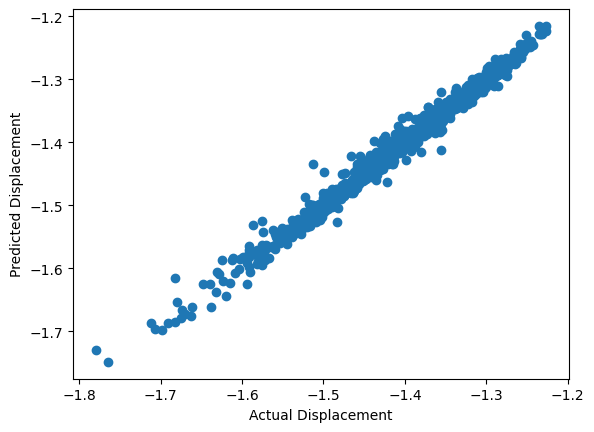

In [72]:

plt.scatter (yD_test, y_pred_test)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_pred_test)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_pred_test)
print(f'Mean Squared Error: {mse:.2f}')

## Mass

In [73]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 50%/50% final results" #path to the folder containing the files
filenames = os.listdir(filepath)
mass_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        mass_data.append(data) #append the data to the list of all data
mass_data = pd.concat(mass_data, axis = 0) #concatenate all the data into a single dataframe

mass_data.index = range(len(mass_data)) #rename indices to avoid issues with duplicates
del mass_data['Displacement3']
del mass_data['Stress2']

mass_data

Loading file: 1-400 results newfile.xlsx
Loading file: 1401-2000 results newfile.xlsx
Loading file: 2001-2500 results newfile.xlsx
Loading file: 2501-3500 results newfile.xlsx
Loading file: 3501-3700 results newfile.xlsx
Loading file: 3701-4000 results newfile.xlsx
Loading file: 4001-4200 results newfile.xlsx
Loading file: 401-1400 results newfile.xlsx
Loading file: 4200-4700 results newfile.xlsx
Loading file: 4701-5000 results newfile.xlsx


,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y,Mass2
0,59.39160,16.34668,22.87477,13.56152,56.73219,39.37897,16.33808,85.87876,11.34289,127.63
1,35.23211,26.18333,27.66177,15.24632,29.87560,45.07896,29.47574,68.14849,13.02467,134.54
2,26.48883,23.32933,37.02466,14.89976,38.91530,32.00901,23.92489,82.37679,14.61354,135.87
3,33.54176,29.35971,40.09899,8.38806,64.62975,48.54654,31.55843,65.27285,18.88546,118.05
4,65.02282,31.31793,46.85201,13.97863,30.97744,39.30506,30.17221,78.77987,13.21986,121.07
...,...,...,...,...,...,...,...,...,...,...
5003,39.07497,13.83198,32.62862,11.02838,66.67895,51.27398,23.89607,66.43648,15.69311,119.31
5004,32.34590,23.22570,25.87489,10.96513,40.28090,47.29294,21.00310,78.00764,11.41261,132.55
5005,60.61776,23.05316,25.53504,12.74924,71.39482,49.13145,18.80726,79.55240,17.41671,115.79
5006,58.62693,19.13819,47.56205,9.24262,29.84110,30.99861,25.57112,75.62581,13.39225,129.54


In [74]:
X_M = mass_data[['triangle', 'small ellipse', 'big ellipse', 'circle',	'back cut length',	'corner',	'triangle to small ellipse',	'circle x',	'circle y']]  # multiple features
y_M = mass_data['Mass2']
X_M

,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y
0,59.39160,16.34668,22.87477,13.56152,56.73219,39.37897,16.33808,85.87876,11.34289
1,35.23211,26.18333,27.66177,15.24632,29.87560,45.07896,29.47574,68.14849,13.02467
2,26.48883,23.32933,37.02466,14.89976,38.91530,32.00901,23.92489,82.37679,14.61354
3,33.54176,29.35971,40.09899,8.38806,64.62975,48.54654,31.55843,65.27285,18.88546
4,65.02282,31.31793,46.85201,13.97863,30.97744,39.30506,30.17221,78.77987,13.21986
...,...,...,...,...,...,...,...,...,...
5003,39.07497,13.83198,32.62862,11.02838,66.67895,51.27398,23.89607,66.43648,15.69311
5004,32.34590,23.22570,25.87489,10.96513,40.28090,47.29294,21.00310,78.00764,11.41261
5005,60.61776,23.05316,25.53504,12.74924,71.39482,49.13145,18.80726,79.55240,17.41671
5006,58.62693,19.13819,47.56205,9.24262,29.84110,30.99861,25.57112,75.62581,13.39225


In [75]:
# creating train and test sets 
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M, test_size=0.3, random_state=4294967295) 
X_train_M

,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y
2319,33.07462,15.56495,26.39408,11.63413,57.71748,31.63604,16.89384,84.82454,19.24884
497,30.31010,29.38033,44.81274,11.89831,36.75910,39.82845,19.80722,88.32389,16.16061
1637,52.40852,18.50767,35.88152,6.41001,71.44712,47.81225,26.54122,77.49866,15.66240
3301,66.84172,30.24661,38.86335,10.64060,54.66283,31.98317,35.11677,82.21981,19.03890
1159,26.37426,16.32512,27.15856,13.57323,44.26276,26.57255,22.95185,85.83058,11.67094
...,...,...,...,...,...,...,...,...,...
4310,43.85655,15.53584,42.40687,11.98425,37.70138,36.81619,33.99299,88.29307,10.31166
3143,55.00200,22.17810,37.27504,10.33606,32.81972,27.99046,34.26764,68.08223,11.83397
3084,39.20457,16.94771,23.80659,14.81013,70.81821,41.16282,18.25939,87.75858,19.30613
290,61.13170,19.65644,37.69913,13.03917,54.86141,30.25108,26.39528,76.07749,16.07350


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipe_M = Pipeline([('polyfeatures', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
cross_val_score(pipe_M, X_train_M, y_train_M, cv=10)

array([0.99932689, 0.99933885, 0.99935594, 0.99938463, 0.99926892,
       0.99909017, 0.99923272, 0.99941563, 0.99939472, 0.99926583])

In [77]:
pipe_M.fit(X_train_M, y_train_M)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

R-squared: 1.00
Mean Squared Error: 0.04


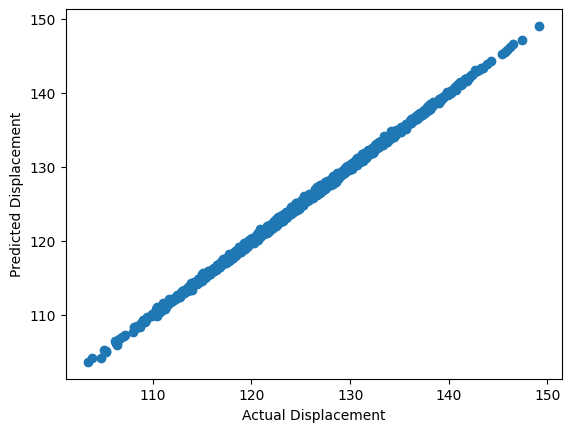

In [78]:
y_M_pred_test = pipe_M.predict(X_test_M)
plt.scatter (y_test_M, y_M_pred_test)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(y_test_M, y_M_pred_test)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(y_test_M, y_M_pred_test)
print(f'Mean Squared Error: {mse:.2f}')

## SHAP testing displacement

In [48]:
import shap

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
shap.initjs()

In [50]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(pipe_D.predict, XD_train)

# Calculate SHAP values for the model
shap_values = explainer(XD_train)

shap.force_plot(shap_values[0, :], XD_test.iloc[0, :])

ExactExplainer explainer: 3506it [05:11, 10.99it/s]                          


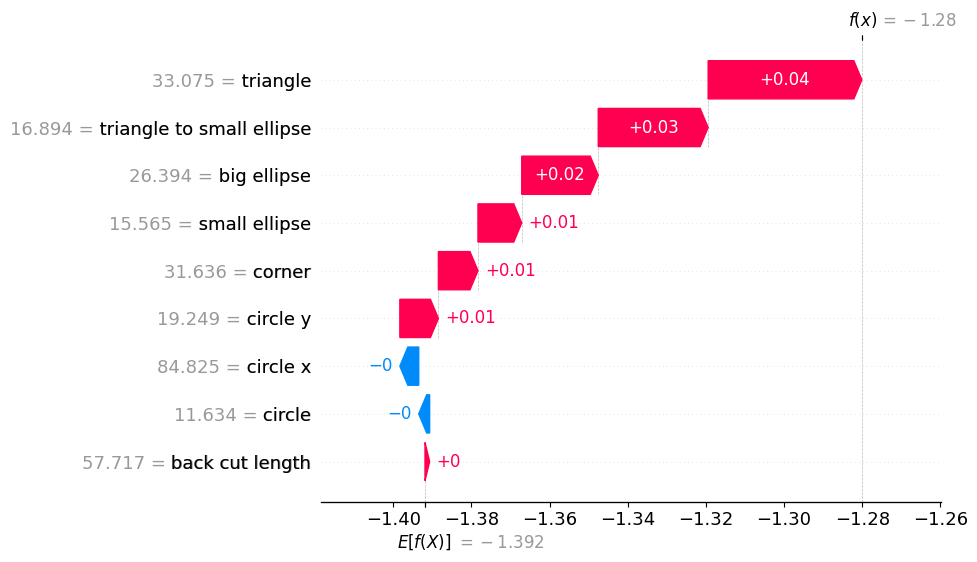

In [51]:
shap.plots.waterfall(shap_values[0, :], max_display=14)

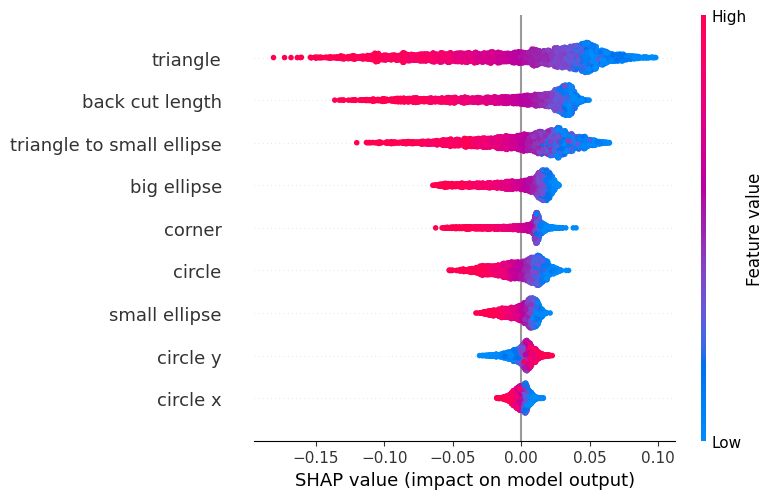

In [52]:
shap.summary_plot(shap_values, XD_train)

## SHAP Testing Mass

In [54]:
# Create a SHAP explainer for the model
explainerM = shap.Explainer(pipe_M.predict, X_train_M)

# Calculate SHAP values for the model
shap_valuesM = explainerM(X_train_M)

shap.force_plot(shap_valuesM[0, :], X_test_M.iloc[0, :])

ExactExplainer explainer: 3506it [18:42,  3.11it/s]                          


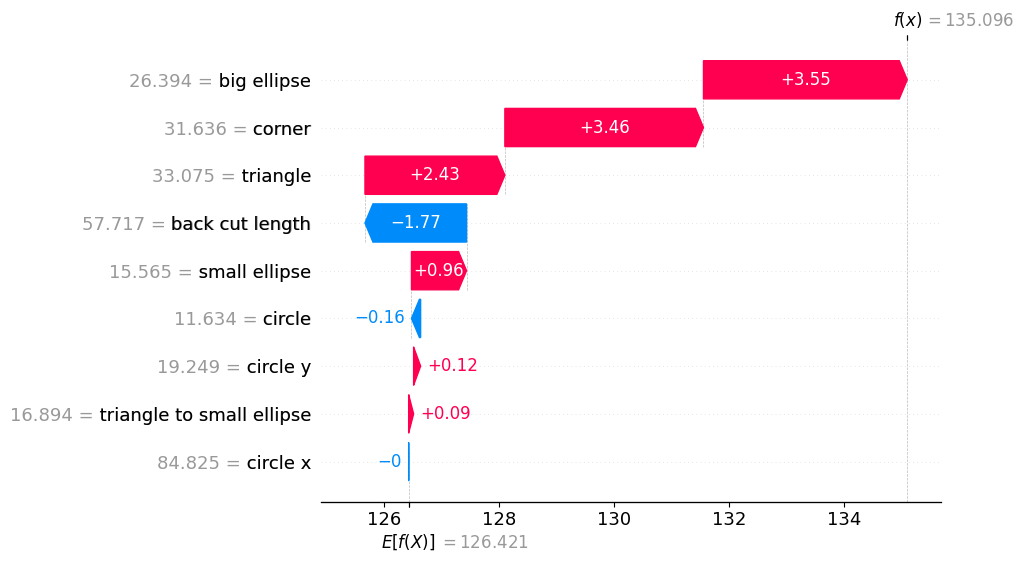

In [57]:
shap.plots.waterfall(shap_valuesM[0, :], max_display=14)

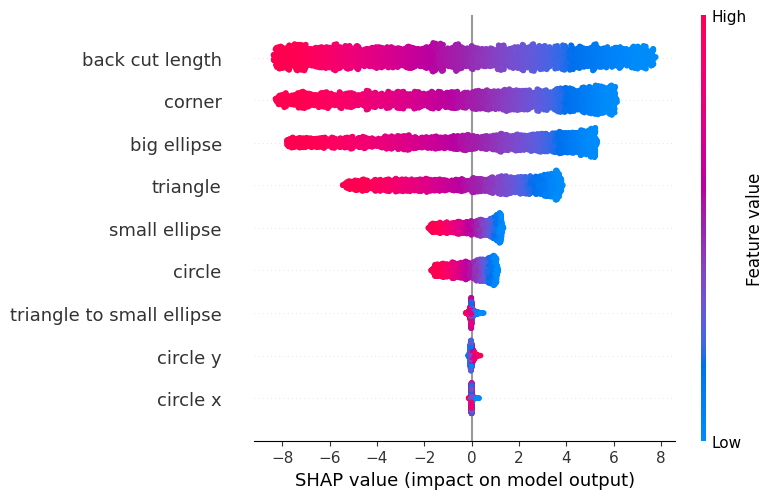

In [58]:
shap.summary_plot(shap_valuesM, X_train_M)

## Genetic Algorithm

In [96]:
def F1 (GA_data1):
    df1 = pd.DataFrame(data = [GA_data1], columns = ['triangle', 'small ellipse', 'big ellipse', 'circle',	'back cut length',	'corner',	'triangle to small ellipse',	'circle x',	'circle y'])
    DispPred = pipe_D.predict(df1)
    return DispPred

def F2 (GA_data2):
    df2 = pd.DataFrame(data = [GA_data2], columns = ['triangle', 'small ellipse', 'big ellipse', 'circle',	'back cut length',	'corner',	'triangle to small ellipse',	'circle x',	'circle y'])
    MassPred = pipe_M.predict(df2)
    return MassPred



In [ ]:
array([59.84779727, 32.85623839, 49.99948576, 15.99373694, 71.6883535 ,
       53.99203124, 21.62435378, 66.87884824, 17.16535962])

In [80]:
n = np.array([59.39160,	16.34668,	22.87477,	13.56152,	56.73219,	39.37897,	16.33808,	85.87876,	11.34289])
0-F1(n)

array([1.37916356])

In [81]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=9,
                         n_obj=2,
                         n_ieq_constr=0,
                         xl=np.array([23, 11, 20, 6, 28.5, 24, 16, 64, 10]),
                         xu=np.array([69, 33, 50, 16, 78.5, 54, 31, 85, 20]))

    def _evaluate(self, x, out, *args, **kwargs):   
        f1 = 0-(F1(x))
        f2 = F2(x)


        

        out["F"] = ([f1, f2])


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-02 12:57:35,742	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [82]:
problem = MyProblem()

algorithm = NSGA2(pop_size=300)

res = minimize(problem, algorithm, ("n_gen", 400), verbose=True, save_history=True, seed=1,)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      300 |     26 |             - |             -
     2 |      600 |     34 |  0.0561044395 |         ideal
     3 |      900 |     45 |  0.1198664489 |         ideal
     4 |     1200 |     55 |  0.0092200941 |             f
     5 |     1500 |     62 |  0.0346625139 |         ideal
     6 |     1800 |     90 |  0.0046808483 |             f
     7 |     2100 |     92 |  0.0243413094 |         ideal
     8 |     2400 |    106 |  0.0066074759 |         ideal
     9 |     2700 |    118 |  0.0204657163 |         ideal
    10 |     3000 |    137 |  0.0027207451 |             f
    11 |     3300 |    164 |  0.0025439708 |             f
    12 |     3600 |    163 |  0.0046807009 |         ideal
    13 |     3900 |    182 |  0.0039898144 |         nadir
    14 |     4200 |    194 |  0.0016035285 |             f
    15 |     4500 |    181 |  0.0032723618 |             f
    16 |     4800 |    205 |  0.0031069302 |         ide

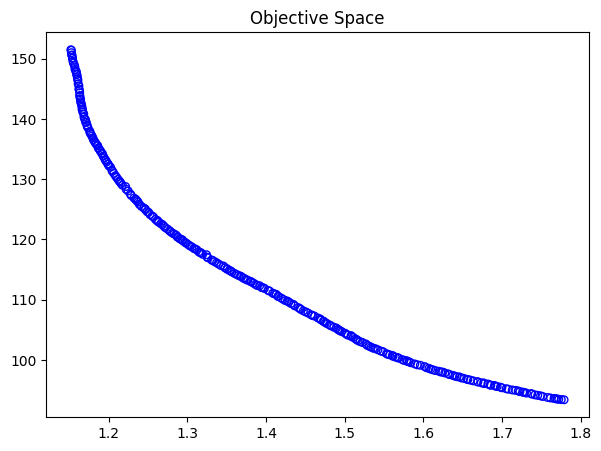

In [83]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [84]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.1518281677806765, 1.7789268507318141]
Scale f2: [93.3932425425288, 151.47911482629945]


In [85]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


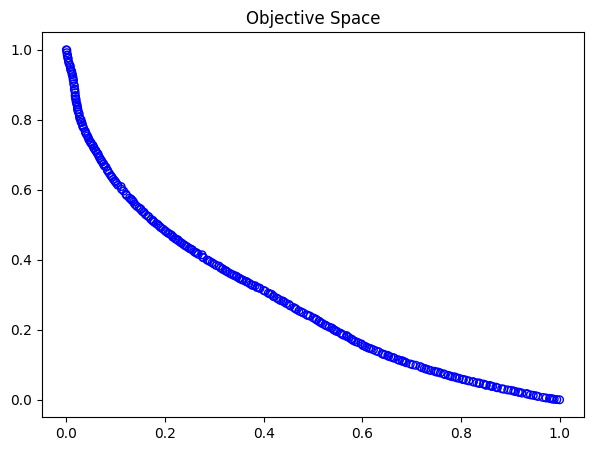

In [86]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Best regarding ASF: Point 
i = 299
F = [ 1.61991256 98.11932124]


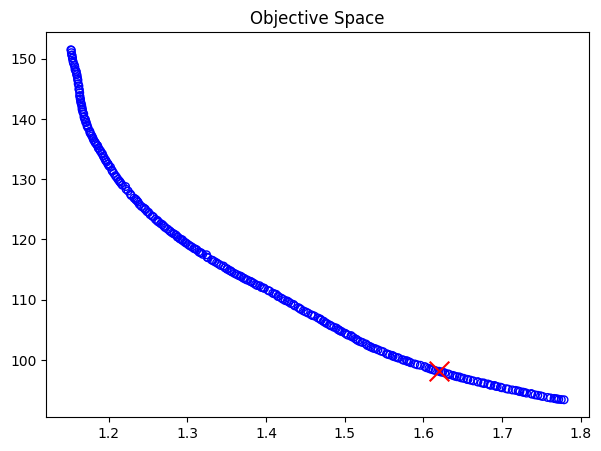

In [92]:
weights = np.array([0.1, 0.9])
from pymoo.decomposition.asf import ASF

decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()

print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [93]:
res.X[i]

array([59.84779727, 32.85623839, 49.99948576, 15.99373694, 71.6883535 ,
       53.99203124, 21.62435378, 66.87884824, 17.16535962])

In [94]:
hist = res.history
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

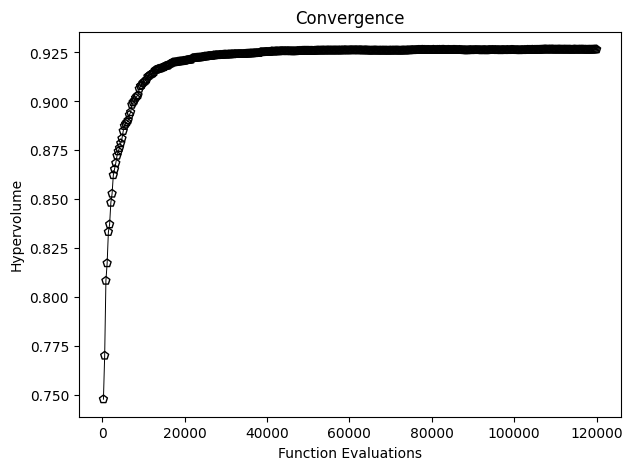

In [95]:
from pymoo.indicators.hv import Hypervolume

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()